<a href="https://colab.research.google.com/github/sohaimainam98/Image-Processing/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
img = cv2.imread('rose.png')

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 2782440
- Shape/Dimensions: (1180, 786, 3)


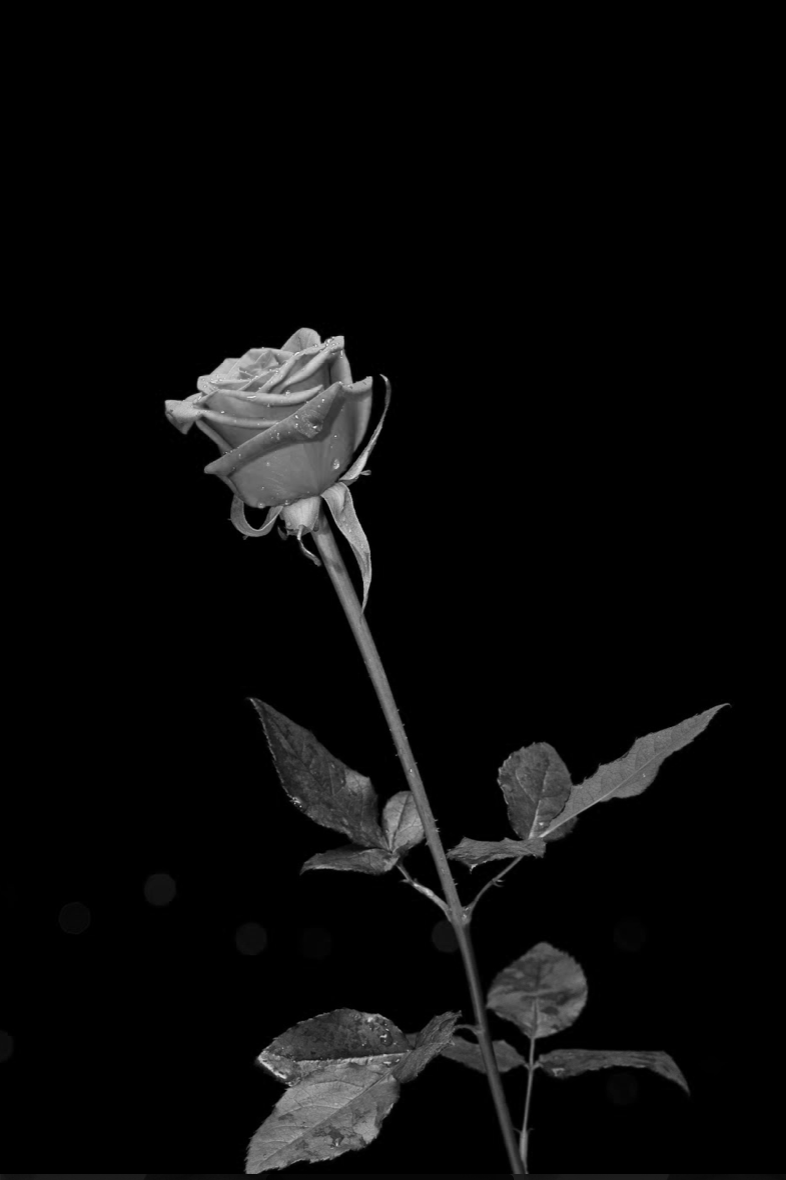

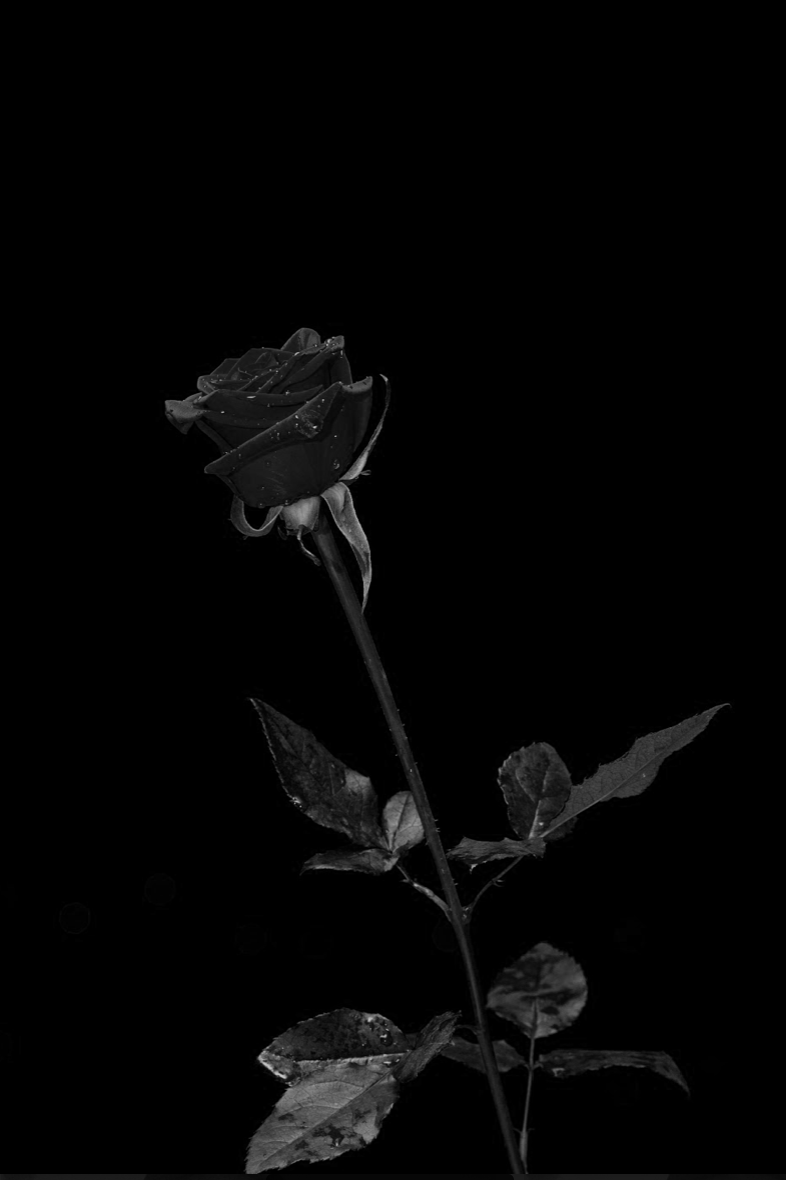

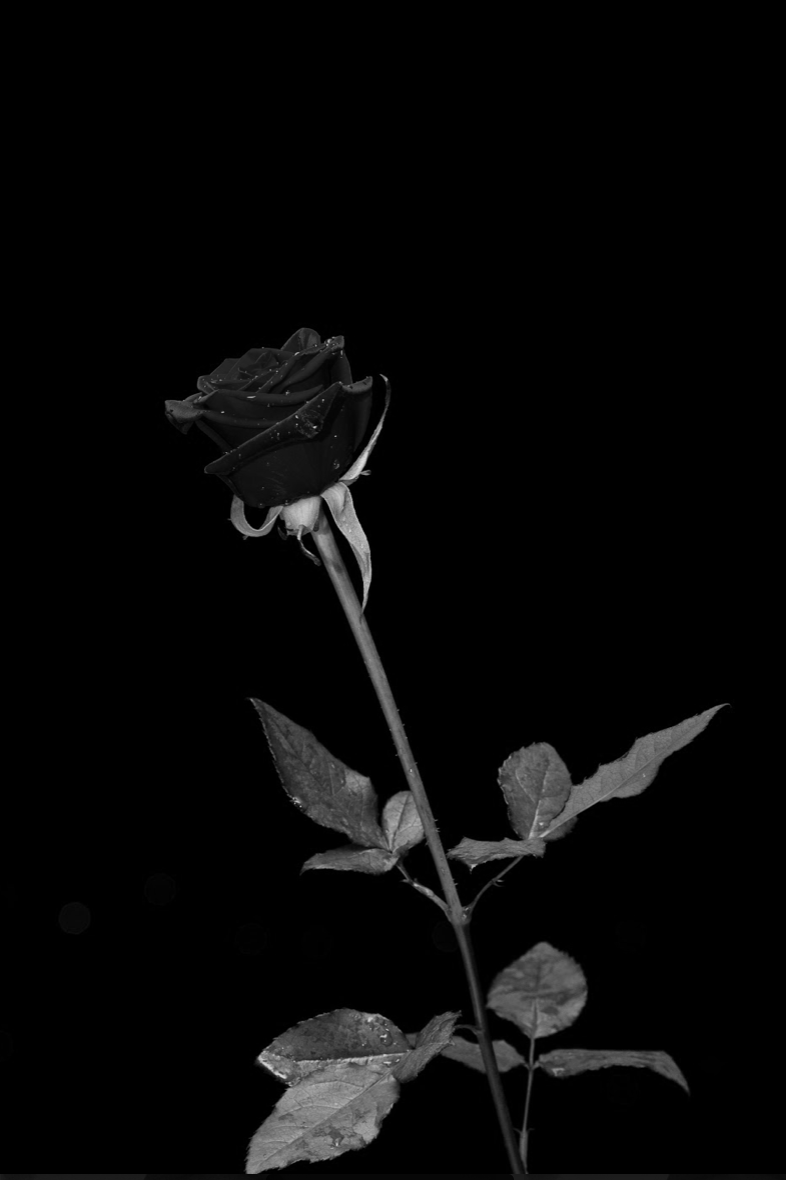

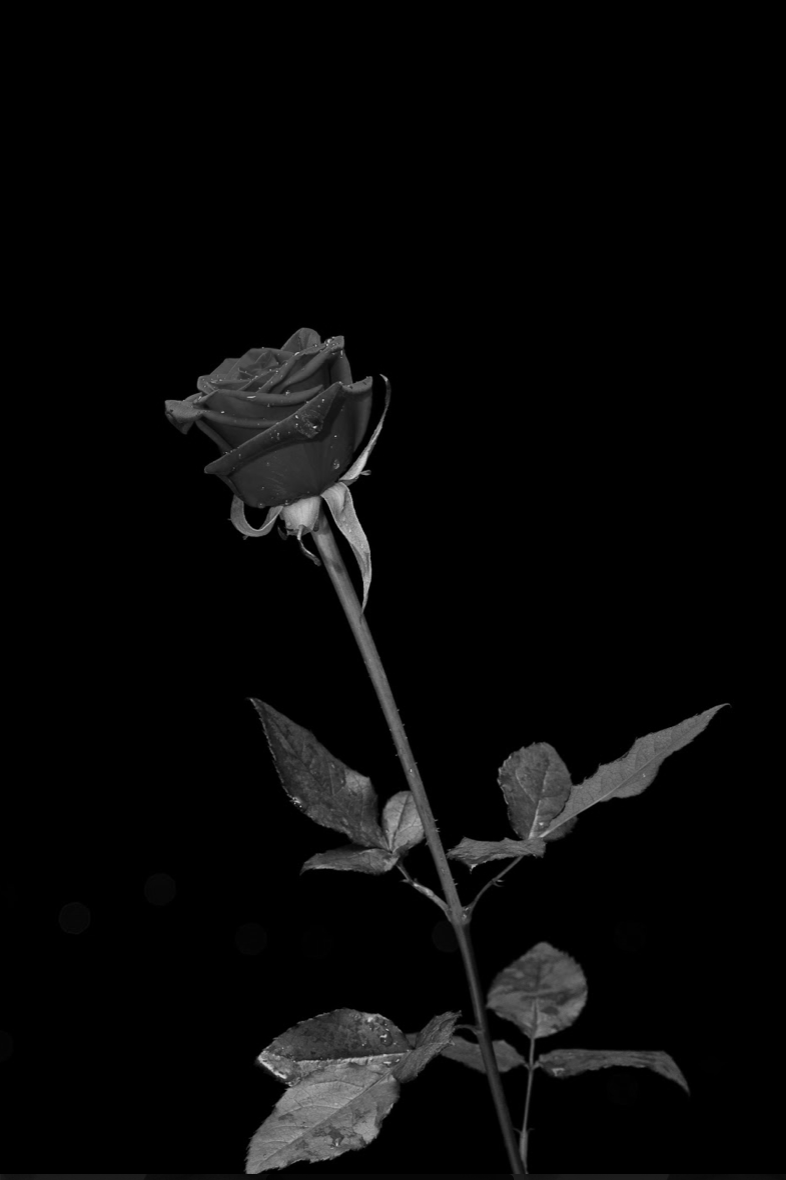

In [9]:
from google.colab.patches import cv2_imshow
blue, green, red = cv2.split(img)
img_gs = cv2.imread('rose.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(red)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(img_gs)

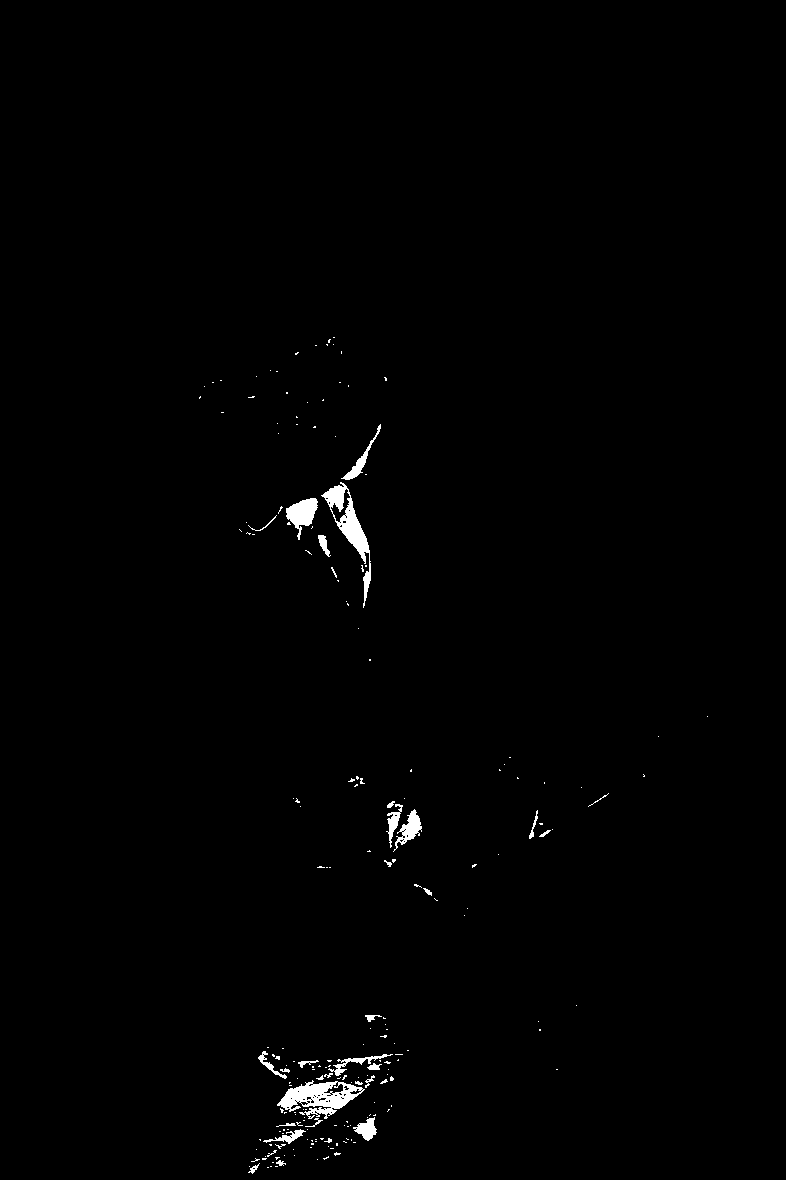

In [10]:
import cv2
img = cv2.imread('rose.png',0)
r, threshold = cv2.threshold(img,125,255, cv2.THRESH_BINARY)
cv2_imshow(threshold)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


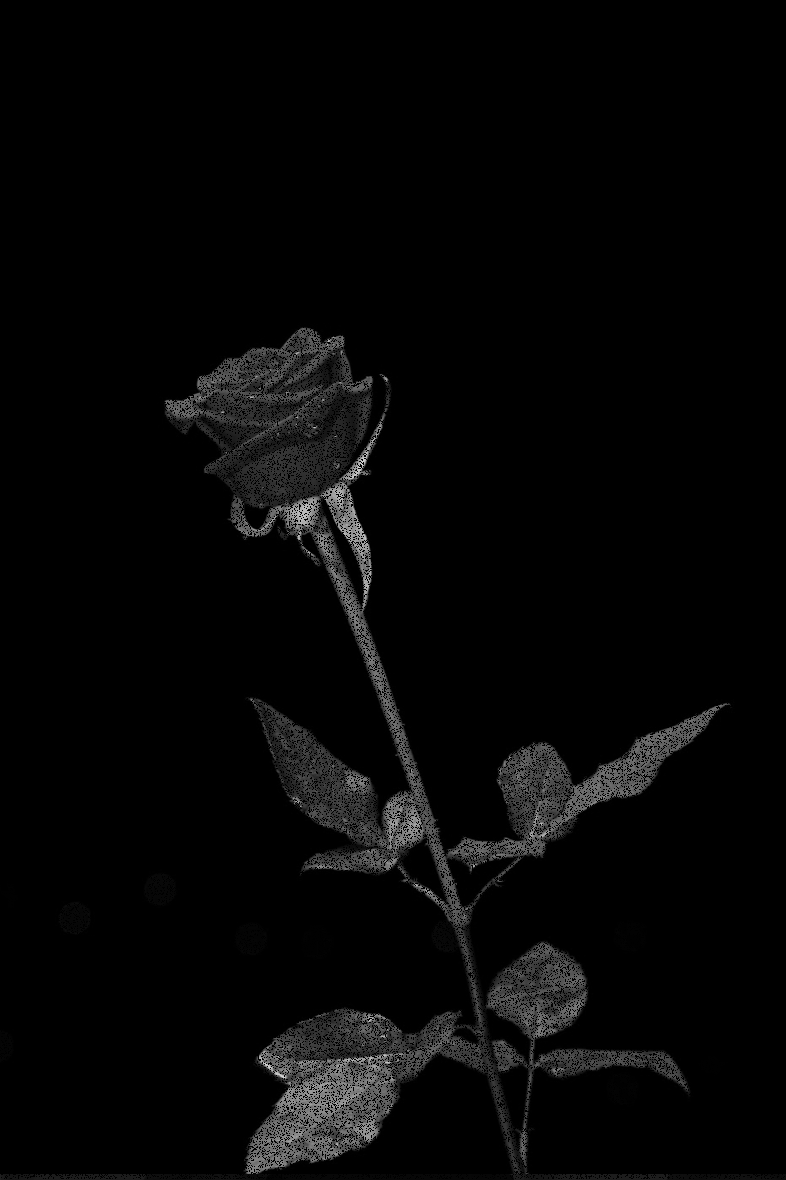

True

In [11]:
import numpy as np
def salt_pepper(prob):
  row, col = img_gs.shape
  s_vs_p = 0.5
  output = np.copy(img_gs)
  num_salt = np.ceil(prob* img_gs.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
  for i in img_gs.shape]
  output[coords] = 1
  num_pepper = np.ceil(prob * img_gs.size * (1. - s_vs_p))
  corrds = [np.random.randint(0, i - 1, int(num_pepper))
  for i in img_gs.shape]
  output[coords] = 0
  cv2_imshow(output)
  return output

sp_05 = salt_pepper(0.5)
cv2.imwrite('sp_05.png', sp_05)







---Effects on S&P Noise Image With Probability 0.5 ---




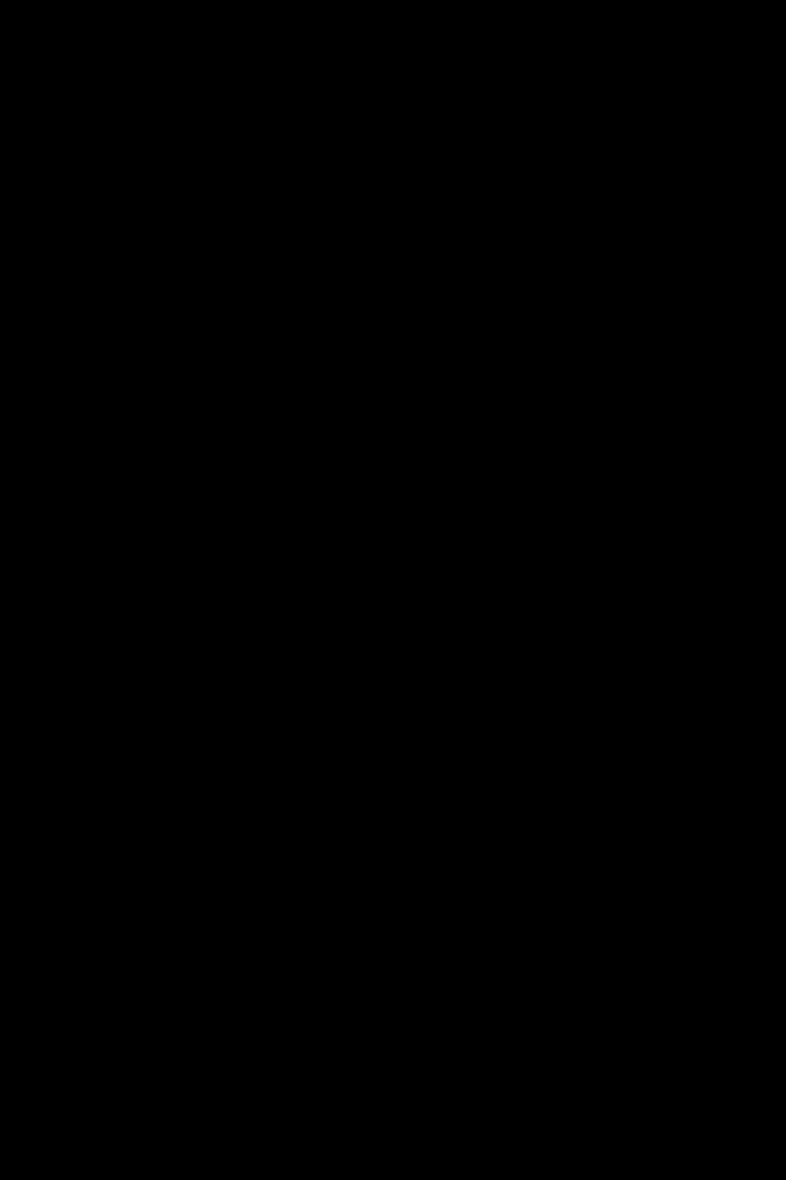

In [12]:
kernel_sharpening = np.array([[-1,-1,-1],
                             [-1,-9,-1],
                             [-1,-1,-1]])
print("\n\n---Effects on S&P Noise Image With Probability 0.5 ---\n\n")
sharpened_img = cv2.filter2D(sp_05, -1, kernel_sharpening)
cv2_imshow(sharpened_img)



---Effects on S&P Noise Image Probability 0.5---




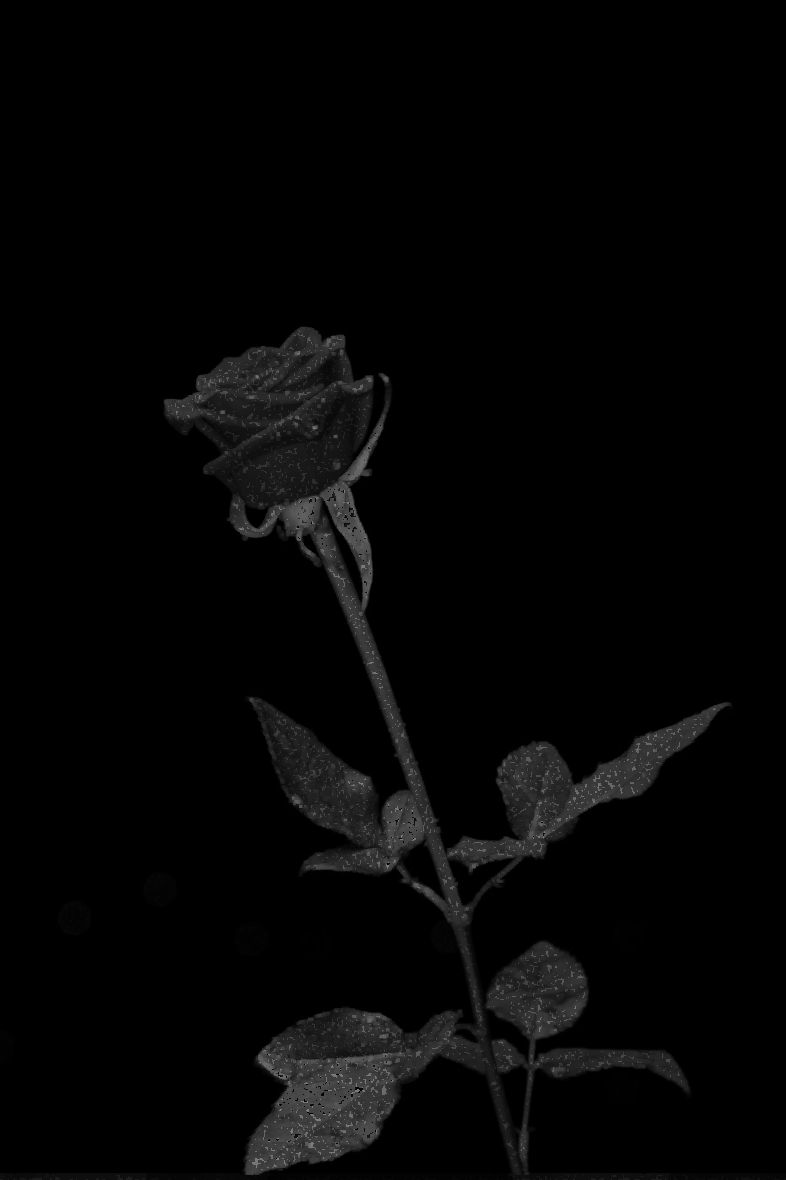

In [14]:
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
  maxf = maximum_filter(img,(3,3))
  minf = minimum_filter(img,(3,3))
  midpoint = (maxf + minf)/2
  cv2_imshow(midpoint)

print("\n\n---Effects on S&P Noise Image Probability 0.5---\n\n")
midpoint(sp_05)



--- Effects on S&P Noise Image With Probability 0.5 ---




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


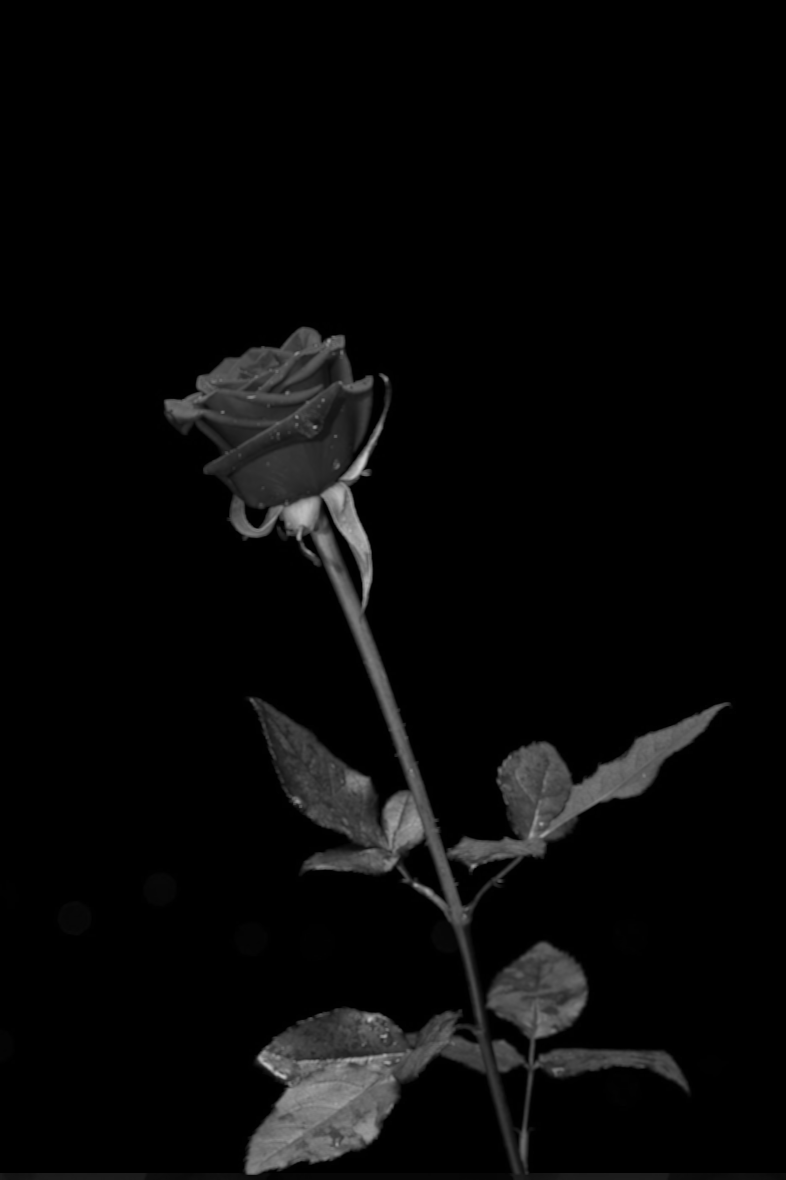

In [17]:
def contraharmonic_mean(image, size,Q):
  num = np.power(img, Q+1)
  denom = np.power(img, Q)
  kernel = np.full(size, 1.0)
  result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
  return result

print("\n\n--- Effects on S&P Noise Image With Probability 0.5 ---\n\n")
cv2_imshow(contraharmonic_mean(sp_05, (3,3), 0.5))

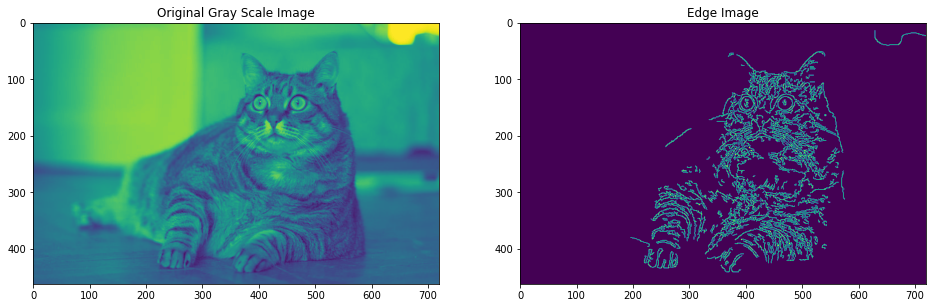

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(16,6))
img_gs = cv2.imread('/content/cat.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gs.png', img_gs)
edges = cv2.Canny(img_gs, 100,200)

plt.subplot(121), plt.imshow(img_gs)
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image')
plt.show()